## Практикум 2. Задание.

1. Сделать единую бд sqlite3 из 3‑х представленных файлов. Выгрузить полученную бд в
датафрейм. Можно использовать метод PD.READ_SQL.
2. Создать столбец exp - содержащий среднее значение лет опыта. Создать столбец sal -
содержащий среднее значение лет зп в рублях
3. Построить ящичковые диаграммы по зп в разрезе региона. Построить ящичковые
диаграммы по зп в разрезе навыков.
4. Проверить наличие зависимости зп от опыта. Проверить наличие зависимости
занятости от региона. Здесь и далее, можно использовать библиотеку SCIPY и её модуль
STATS, для проведения статистических тестов – Т-тестов (Стьюдента), теста Хи-квадрат (Пирсона) и т.п.
5. Выделить из названий вакансий две группы - Seniors (ведущий, старший) и Others.
Можно использовать метод DF.MAP и строковые функции питона, такие как
REPLACE.
6. Проверить наличие зависимости зп от групп. (ДО ЭТОГО СДЕЛАНО)
7. C помощью PANDAS создайте датафрейм из 1 млн. строк, содержащий 4 столбца – пол,
возраст, доход, профессия. В категориальной переменной профессии сделайте 3-4
категории, в переменной пол – 2, возраст и доход сделайте количественными, с типом
INT. Для генерации этих столбцов используйте методы NP.RANDOM.NORMAL,
NP.RANDOM.CHOICE.
8. Замерьте объем памяти датафрейма в памяти с помощью методов DF.INFO(),
DF.MEMORY_USAGE()
9. Сохраните датафрейм в формате CSV, загрузите его в новый датафрейм и замерьте
скорость записи и чтения, с помощью «магической» команды %%TIMEIT.
10. В качестве агрегации надо рассчитать средний возраст, максимальный доход, самый
частый пол, самый редкий тип профессии. Замерьте время выполнения этих операций с
помощью «магической» команды %%TIMEIT.

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import shutil
import re
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Сделать единую бд sqlite3 из 3‑х представленных файлов. Выгрузить полученную бд в датафрейм. 

In [2]:
data1 = pd.read_csv("data/test1.csv", sep="\t")
data2 = pd.read_csv("data/test2.csv", sep="\t")
shutil.copy("data/test3.db", "data/all_data.db")
all_data = sqlite3.connect("data/all_data.db")
cursor = all_data.cursor()
cursor.execute("""ALTER TABLE vacancies RENAME COLUMN "опыт\'" TO опыт""")
data1.to_sql('vacancies', all_data, if_exists='append', index=False)
data2.to_sql('vacancies', all_data, if_exists='append', index=False)
all_data.commit()
all_data.close()

In [3]:
# Check amount of data
(len(data1) + len(data2)
 + sqlite3.connect("data/test3.db").cursor().execute("SELECT COUNT(*) FROM vacancies").fetchone()[0])

2000

In [4]:
sqlite3.connect("data/all_data.db").cursor().execute("SELECT COUNT(*) FROM vacancies").fetchone()[0]

2000

In [5]:
sql_data = sqlite3.connect("data/all_data.db")
all_data = pd.read_sql("SELECT * FROM vacancies", sql_data)
sql_data.close()
all_data

,id,название,опыт,занятость,зп,работодатель,регион,описание,навыки
0,77713311,Разработчик курсов IT и ИБ,1–3 года,"Частичная занятость, удаленная работа",от 300 000 руб. до вычета налогов,ООО Кодебай,Москва,"Меня зовут Дмитрий Фёдоров, я представляю ООО ...","['Работа в команде', 'Информационная безопасно..."
1,77685086,Full-stack разработчик,более 6 лет,"Полная занятость, полный день",от 550 000 KZT до вычета налогов,ТОО Ruba Technology,,Благодарим за проявленный интерес! Требования ...,"['Laravel', 'HTML/CSS', 'Bitrix', 'Wordpress',..."
2,77657936,.net разработчик,1–3 года,"Полная занятость, полный день",з/п не указана,ООО UZINFOCOM,Ташкент,Обязанности: - Разработка новых проектов;- Под...,"['JavaScript', 'ASP.NET', 'AngularJS', 'C#', '..."
3,77704004,Senior PHP Developer,3–6 лет,"Полная занятость, полный день",от 250 000 до 400 000 руб. на руки,"Fashion Cute LLC, Представительство",Москва,- поддержка и доработка существующих проектов ...,"['Git', 'MySQL', 'PHP', 'ООП', 'Yii']"
4,75888105,Python-разработчик в Цифровые поверхности Салю...,3–6 лет,"Полная занятость, полный день",з/п не указана,Сбер. IT,,SberDevices — уникальное IT-пространство внутр...,[]
...,...,...,...,...,...,...,...,...,...
1995,74177259,PHP Developer,1–3 года,"Полная занятость, полный день",от 80 000 до 220 000 руб. на руки,Perfect Panel,None,Perfect Panel — SaaS-платформа для автоматизац...,"['MySQL', 'ООП', 'Redis', 'Git', 'Yii', 'PHP',..."
1996,77317926,"Backend разработчик (PHP, Yii)",1–3 года,"Полная занятость, полный день",от 200 000 до 250 000 руб. на руки,ООО Инфоурок,Москва,"Привет, мы ищем Yii backend PHP developer. О н...","['Yii', 'Memcached', 'MySQL', 'Redis', 'PHP']"
1997,76718757,Backend разработчик,1–3 года,"Полная занятость, полный день",от 40 000 руб. на руки,ООО ПДВ,None,Здравствуйте! Ищем в команду лучшего backend-e...,"['Git', 'HTML', 'CSS', 'Linux', 'JS', 'Vue.js'..."
1998,75581104,ARM разработчик,3–6 лет,"Полная занятость, полный день",з/п не указана,Delta Solutions,"Москва, Трубная, Цветной бульвар",Мы в Delta Solutions уже более 15 лет создаем ...,"['C/C++', 'Assembler', 'ARM', 'Linux', 'Git']"


#### 2. Создать столбец exp - содержащий среднее значение лет опыта. Создать столбец sal - содержащий среднее значение лет зп в рублях

In [6]:
def get_exp(exp_str: str) -> int:
    exp_dict = {
        'не требуется': 0,
        'более 6 лет': 6,
        '1–3 года': 2,
        '3–6 лет': 4.5,
        '': 0,
        None: 0
    }
    return exp_dict[exp_str]


all_data["средний опыт"] = all_data["опыт"].apply(get_exp)

In [7]:
def parse_salary(salary_str: str) -> int:
    if salary_str is None or "не указана" in salary_str:
        return None

    convert_to_rub = {
        "BYN": 30,
        "USD": 90,
        "EUR": 100,
        "KZT": 0.17
    }
    coeff = 0.87 if "до вычета" in salary_str else 1

    salary_str = salary_str.replace("\u00a0", "")  # Replace non-breaking space with regular space
    salary_str = (salary_str
                  .replace("бел. руб.", "BYN")
                  .replace("руб.", "RUB")
                  .replace("на руки", "")
                  .replace("до вычета налогов", "")
                  .strip())

    salary_from = salary_to = 0
    salary_values = re.findall(r'\d+', salary_str)
    if "от" in salary_str and "до" in salary_str:
        salary_from, salary_to = map(int, salary_values)
    elif "от" in salary_str:
        salary_from = int(salary_values[0])
    elif "до" in salary_str:
        salary_to = int(salary_values[0])

    for currency, rate in convert_to_rub.items():
        if currency in salary_str:
            salary_from *= rate
            salary_to *= rate
            break

    if salary_from == 0 and salary_to == 0:
        return None
    elif salary_from == 0:
        return salary_to * coeff
    elif salary_to == 0:
        return salary_from * coeff
    else:
        return (salary_from + salary_to) / 2 * coeff


all_data["средняя зарплата"] = all_data["зп"].apply(parse_salary)

#### 3. Построить ящичковые диаграммы по зп в разрезе региона. Построить ящичковые диаграммы по зп в разрезе навыков.

In [8]:
# Clean up region names
all_data['регион'] = all_data['регион'].apply(lambda x: '' if x is None else x)
all_data['регион'] = all_data['регион'].apply(lambda x: 'Москва' if 'Москва' in x else x)
all_data['регион'] = all_data['регион'].apply(lambda x: 'Санкт-Петербург' if 'Санкт-Петербург' in x else x)
all_data['регион'] = all_data['регион'].apply(lambda x: 'Казань' if 'Казань' in x else x)
all_data['регион'] = all_data['регион'].apply(lambda x: 'Алматы' if 'Алматы' in x else x)
all_data['регион'] = all_data['регион'].apply(lambda x: 'Минск' if 'Минск' in x else x)
all_data['регион'] = all_data['регион'].apply(lambda x: 'Омск' if 'Омск' in x else x)

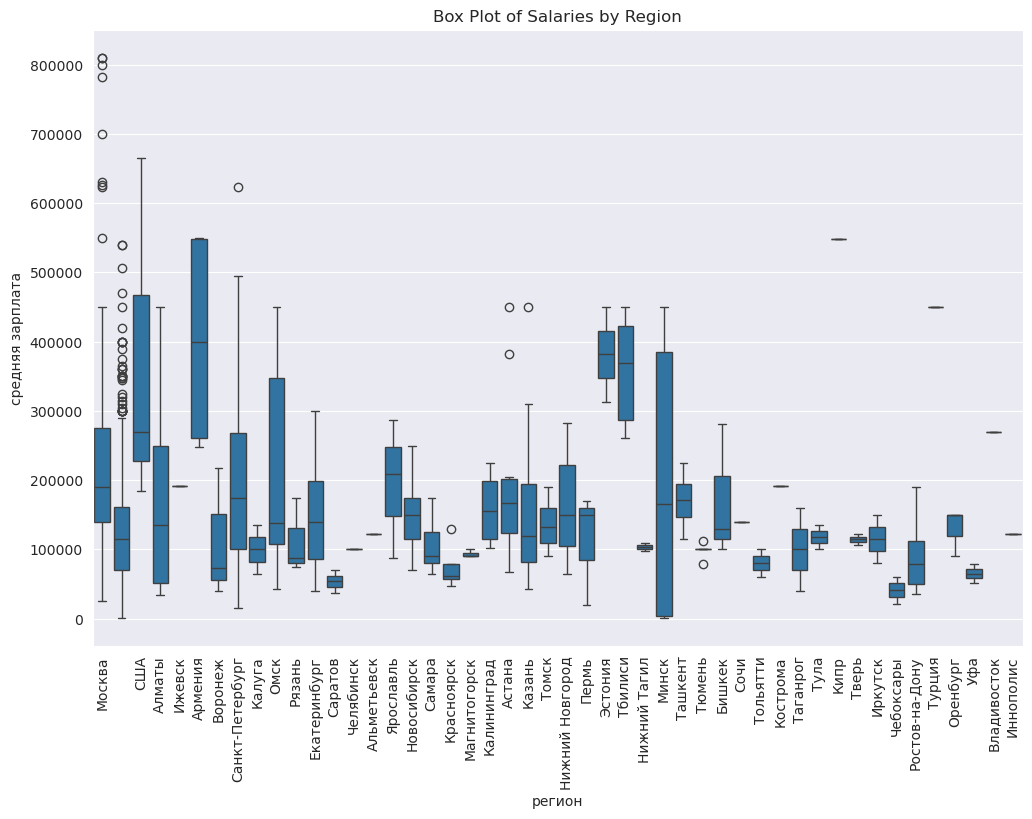

In [9]:
# Filter out regions with less than 2 entries
region_counts = all_data['регион'].value_counts()
filtered_data = all_data[all_data['регион'].isin(region_counts[region_counts > 1].index)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='регион', y='средняя зарплата', data=filtered_data[filtered_data['средняя зарплата'] < 2e6])
plt.xticks(rotation=90)
plt.title('Box Plot of Salaries by Region')
plt.show()

In [10]:
all_skills = set()
all_data['навыки'].apply(lambda x: all_skills.update(x
                                                     .replace("'", "")
                                                     .replace("[", "")
                                                     .replace("]", "")
                                                     .split(',')))

all_skills = list(map(str.strip, all_skills))

In [11]:
skills_data = pd.DataFrame(columns=["навык", "средняя зарплата"])
for skill in all_skills:
    skill_data = all_data[all_data['навыки'].apply(lambda x: skill in x)]
    skill_data = skill_data[['средняя зарплата']]
    skill_data['навык'] = skill
    skills_data = pd.concat([skill_data, skills_data], ignore_index=True)
skills_data

/tmp/ipykernel_43257/1884700317.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  skills_data = pd.concat([skill_data, skills_data], ignore_index=True)


,средняя зарплата,навык
0,170000.0,Spring Data
1,NaN,Креативность
2,195000.0,Креативность
3,22500.0,Креативность
4,65000.0,Администрирование серверов Windows
...,...,...
30442,150000.0,
30443,225000.0,
30444,40000.0,
30445,NaN,


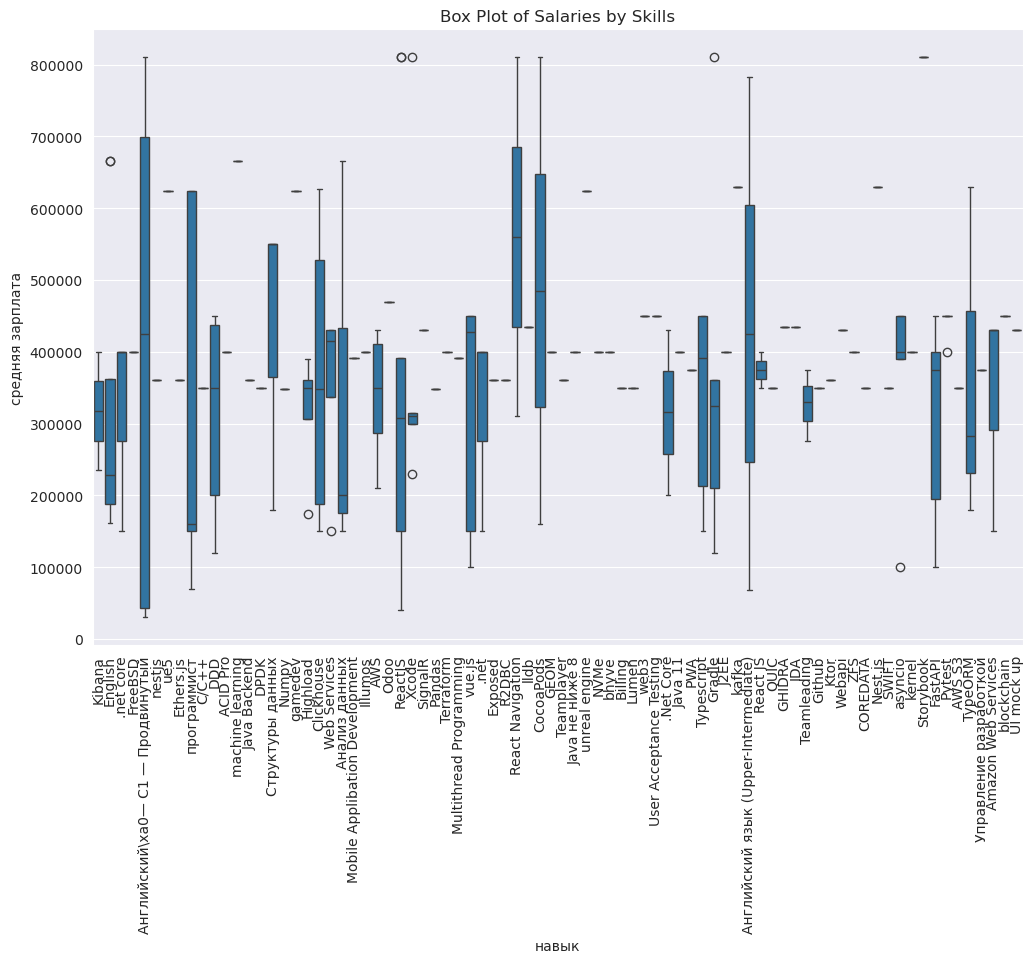

In [12]:
# Filter top 80 skills by count
top_skills = (skills_data[skills_data['средняя зарплата'] < 2e6].groupby('навык')['средняя зарплата']
              .mean()
              .sort_values(ascending=False)
              .head(80)
              .reset_index())
filtered_data = skills_data[skills_data['навык'].isin(top_skills['навык'])]

plt.figure(figsize=(12, 8))
sns.boxplot(x='навык', y='средняя зарплата', data=filtered_data[filtered_data['средняя зарплата'] < 2e6])
plt.xticks(rotation=90)
plt.title('Box Plot of Salaries by Skills')
plt.show()

#### 4. Проверить наличие зависимости зп от опыта. Проверить наличие зависимости занятости от региона.

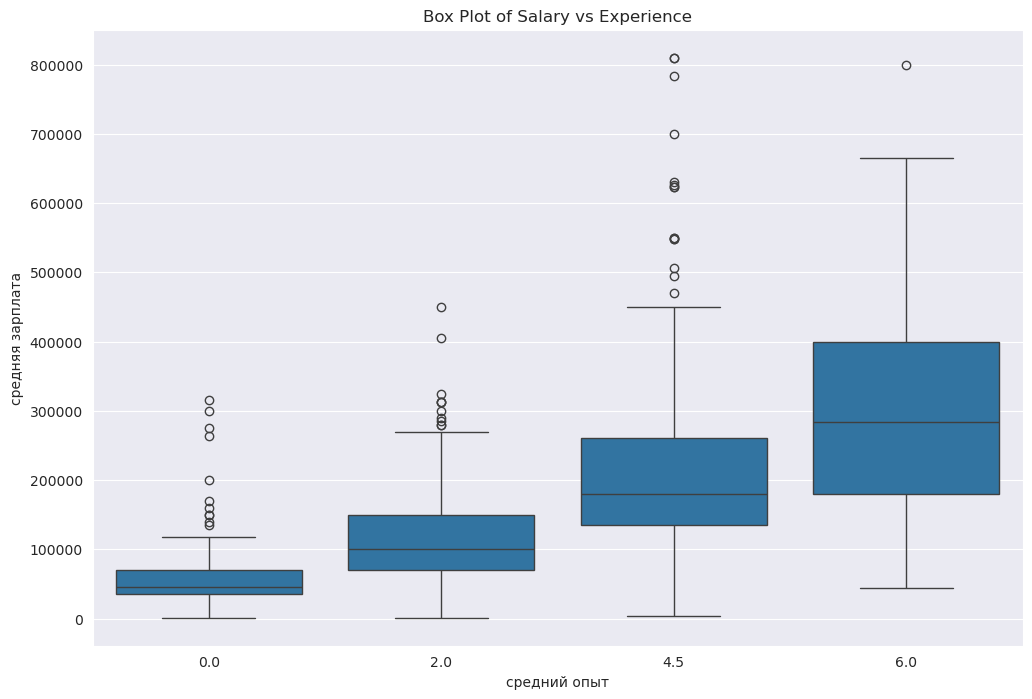

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='средний опыт', y='средняя зарплата', data=all_data[all_data['средняя зарплата'] < 2e6])
plt.title('Box Plot of Salary vs Experience')
plt.show()

In [14]:
pd.crosstab(all_data['занятость'], all_data['регион'])

регион,,Алматы,Альметьевск,Армения,Астана,Астрахань,Баку,Батуми,Бишкек,Брянск,...,Усть-Каменогорск,Уфа,Химки,Чебаркуль,Чебоксары,Челябинск,Шахты,Эстония,Якутск,Ярославль
занятость,,,,,,,,,,,,,,,,,,,,,
,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Полная занятость, гибкий график",71,1,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Полная занятость, полный день",793,25,1,3,11,1,0,0,6,1,...,2,0,1,1,1,2,1,1,1,4
"Полная занятость, сменный график",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Полная занятость, удаленная работа",162,7,0,5,5,0,1,1,1,0,...,0,2,0,0,0,0,0,1,0,0
"Проектная работа/разовое задание, гибкий график",2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Проектная работа/разовое задание, полный день",4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Проектная работа/разовое задание, удаленная работа",3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Стажировка, гибкий график",15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 5. Выделить из названий вакансий две группы - Seniors (ведущий, старший) и Others.

In [15]:
def categorize_title(title):
    if title is None:
        return 'Others'
    if 'ведущий' in title.lower() or 'старший' in title.lower() or 'senior' in title.lower():
        return 'Seniors'
    else:
        return 'Others'


all_data['category'] = all_data['название'].apply(categorize_title)

#### 6. Проверить наличие зависимости зп от групп

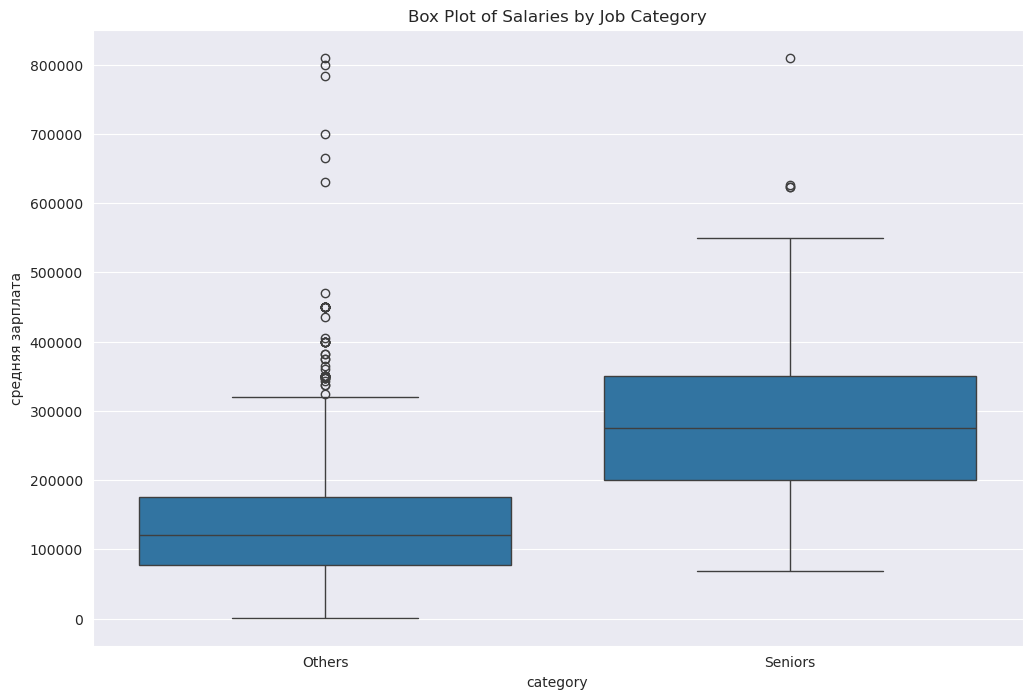

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='средняя зарплата', data=all_data[all_data['средняя зарплата'] < 2e6])
plt.title('Box Plot of Salaries by Job Category')
plt.show()

#### 7. C помощью PANDAS создайте датафрейм из 1 млн. строк, содержащий 4 столбца – пол, возраст, доход, профессия. В категориальной переменной профессии сделайте 3-4 категории, в переменной пол – 2, возраст и доход сделайте количественными, с типом INT. Для генерации этих столбцов используйте методы NP.RANDOM.NORMAL, NP.RANDOM.CHOICE.

In [17]:
num_rows = 1_000_000

np.random.seed(42)
genders = pd.Series(pd.Categorical(np.random.choice(['Male', 'Female'], num_rows)))
ages = pd.Series(np.random.normal(loc=35, scale=10, size=num_rows).astype(int))
incomes = pd.Series(np.random.normal(loc=50000, scale=15000, size=num_rows).astype(int))
professions = pd.Series(pd.Categorical(np.random.choice(['Python Developer', 'Research Engineer', 'Java Developer', 'CV Engineer'], num_rows)))

df = pd.DataFrame({
    'Gender': genders,
    'Age': ages,
    'Income': incomes,
    'Profession': professions
})
df

,Gender,Age,Income,Profession
0,Male,35,44247,Java Developer
1,Female,15,64186,Java Developer
2,Male,32,25864,Java Developer
3,Male,54,53792,CV Engineer
4,Male,18,41923,CV Engineer
...,...,...,...,...
999995,Female,39,56780,Research Engineer
999996,Female,46,48405,CV Engineer
999997,Female,20,60669,Python Developer
999998,Female,26,54639,Python Developer


#### 8. Замерьте объем памяти датафрейма в памяти с помощью методов DF.INFO(), DF.MEMORY_USAGE()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   Gender      1000000 non-null  category
 1   Age         1000000 non-null  int64   
 2   Income      1000000 non-null  int64   
 3   Profession  1000000 non-null  category
dtypes: category(2), int64(2)
memory usage: 17.2 MB


In [19]:
df.memory_usage()

Index             128
Gender        1000124
Age           8000000
Income        8000000
Profession    1000204
dtype: int64

#### 9. Сохраните датафрейм в формате CSV, загрузите его в новый датафрейм и замерьте скорость записи и чтения, с помощью «магической» команды %%TIMEIT.

In [20]:
df.to_csv('data/dataframe_2.csv', index=False)

In [21]:
%%timeit 
df.to_csv('data/dataframe_2.csv', index=False)

728 ms ± 168 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%timeit 
df_new = pd.read_csv('data/dataframe_2.csv')

218 ms ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 10. В качестве агрегации надо рассчитать средний возраст, максимальный доход, самый частый пол, самый редкий тип профессии. Замерьте время выполнения этих операций с помощью «магической» команды %%TIMEIT.

In [23]:
%%timeit
df['Age'].mean()

582 μs ± 56.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [24]:
%%timeit
df['Income'].max()

467 μs ± 17.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [25]:
%%timeit
df['Gender'].mode()[0]

2.85 ms ± 126 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%%timeit
df['Profession'].value_counts().idxmin()

2.05 ms ± 283 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
